<a href="https://colab.research.google.com/github/Chigume/Customer-Churn/blob/main/Copy_of_Predict_Customer_Churn_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study: Predict Customer Churn Using Machine Learning
Prepared by Chigume Abgirl

## 1: Frame the Problem

Customer churn is a major problem and one of the most important concerns for
large companies. Due to the direct effect on the revenues of the companies,
especially in the telecom field, companies are seeking to develop means to
predict potential customers to churn. Therefore, finding factors that increase
customer churn is important to take necessary actions to reduce this churn. The
main contribution of your work is to develop a churn prediction model which
assists telecom operators to predict customers who are most likely subject to
churn. Perform the following operations as you create the much needed
machine learning application.

## 3: SetUp: Importing the Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

##Quiet warnings since this is a demo (it quiets future and deprecation warnings).


In [103]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 4: Access Data and Clean It Up

In [19]:
# Read the data and view the top portion to see what we are dealing with.
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
# See if the data is usable.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


##Analyze if there is non-numeric data in the 'TotalCharges' column since it's showing as an object instead of float64.


In [158]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [160]:
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array([1, 0])

In [161]:
# See how many rows and columns.
data.shape

(7043, 20)

More data cleanup: next we’ll convert the categorical values into numeric values.

In [165]:
data['gender'] = data['gender'].map(map_series).fillna(data['gender'])

data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
data.info()

NameError: ignored

Let's look at relationships between customer data and churn using correlation.

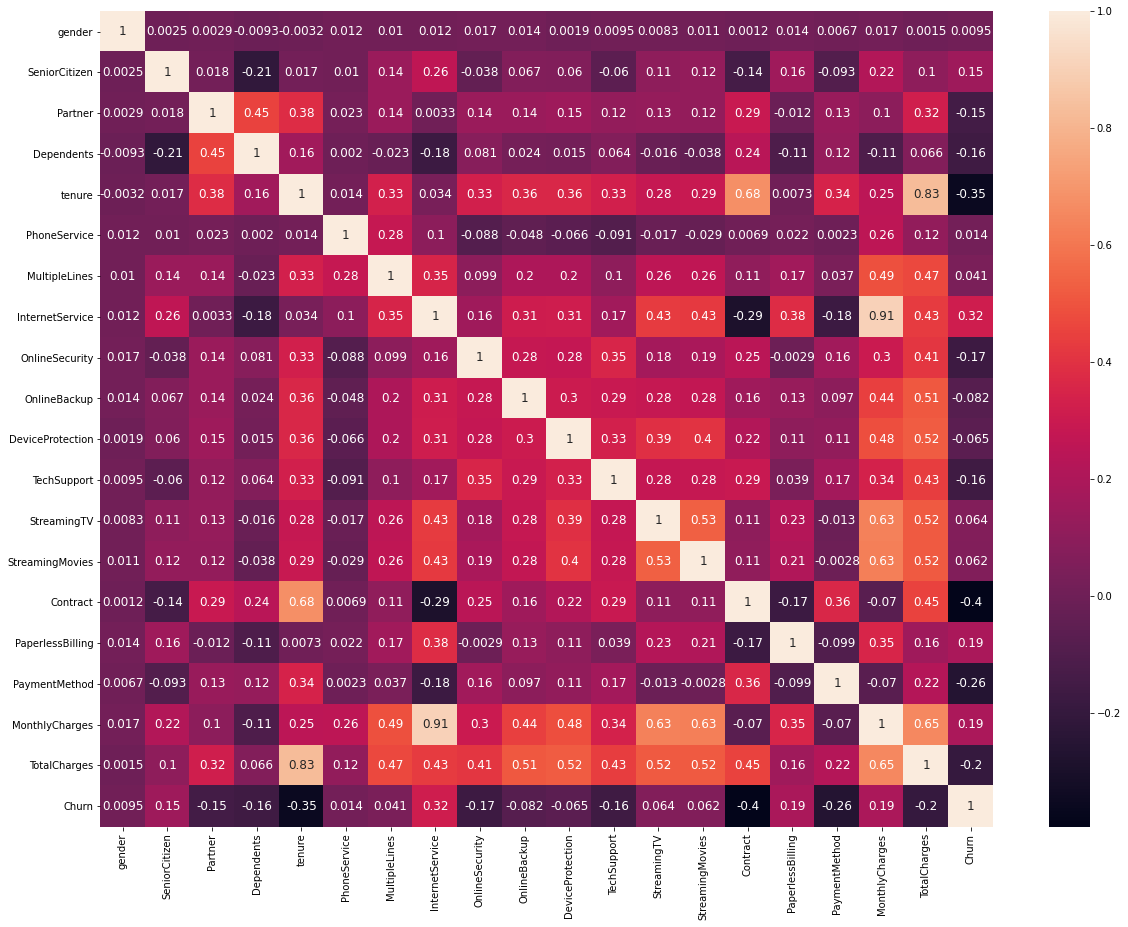

In [107]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Our goal is to avoid multicollinearity by dropping features that are closely correlated with each other. For example here it is TotalCharges and MonthlyCharges. So we will drop TotalCharges.

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Rerun corr chart after cleanup. TotalCharges should not appear in the corr chart. 

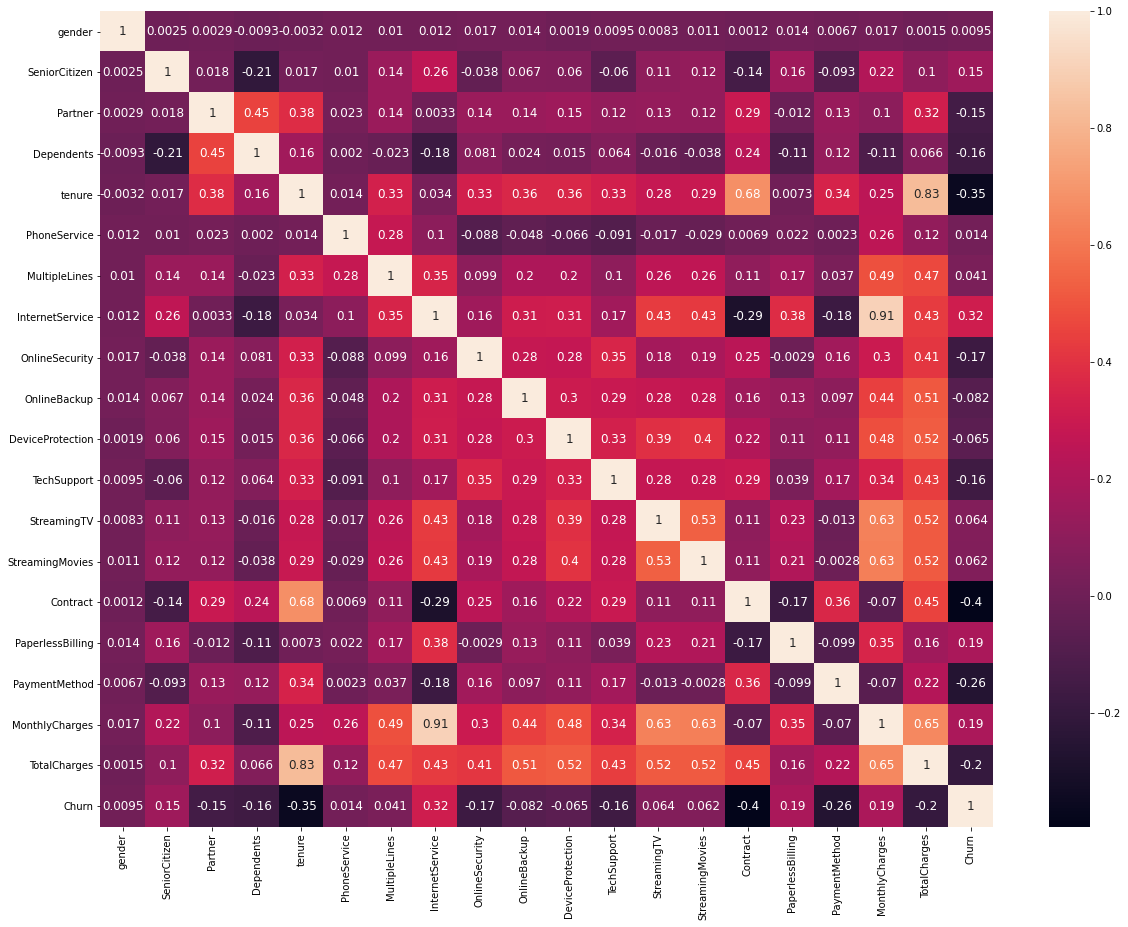

In [109]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 5: Explore The Data 

In [166]:
print(len(data['Churn']))

7043


In [167]:
data['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

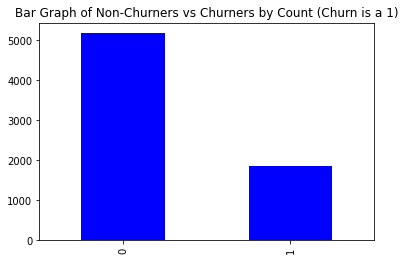

In [168]:
data['Churn'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()


Explore some contingencies on how some features relate to churn.

In [169]:
gender_churn_contingency = pd.crosstab(data["gender"], data["Churn"])
display(gender_churn_contingency)


Churn,0,1
gender,,
0,2630,930
1,2544,939


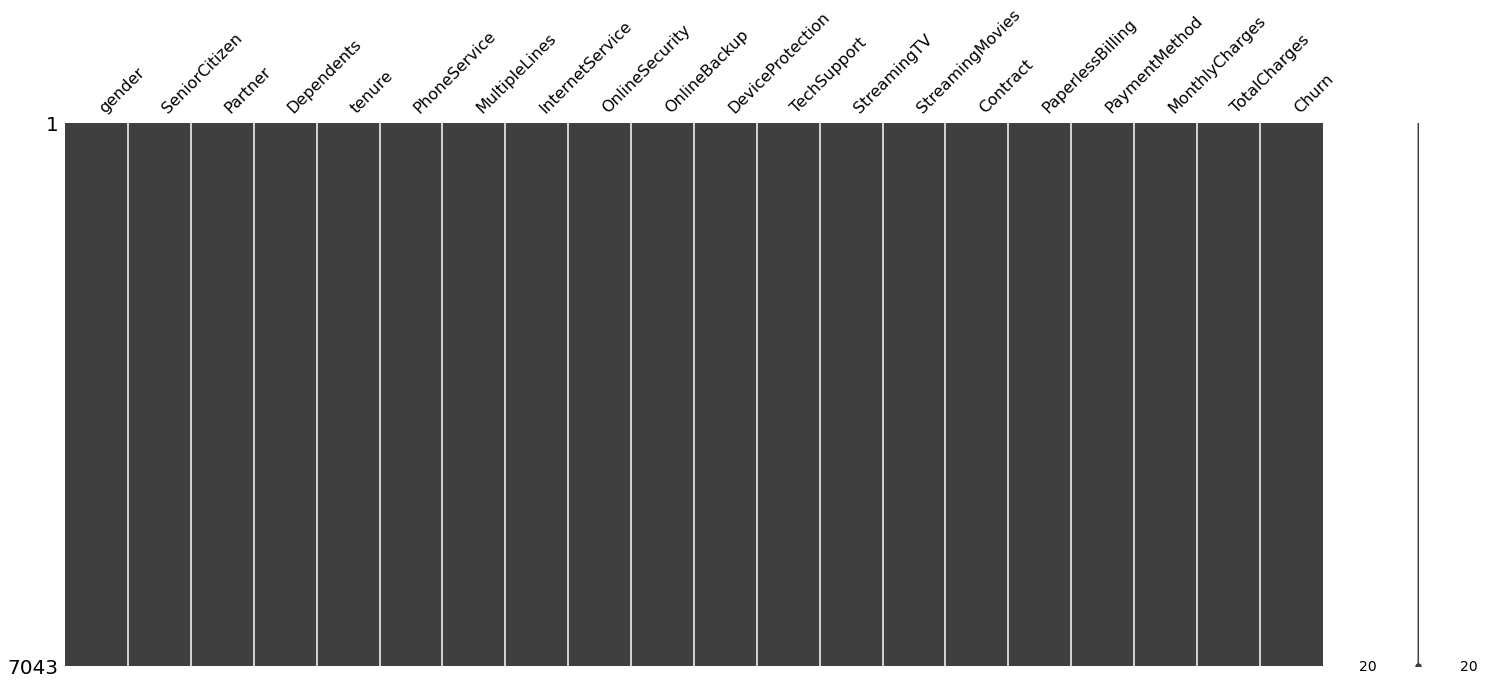

In [170]:
ms.matrix(data)


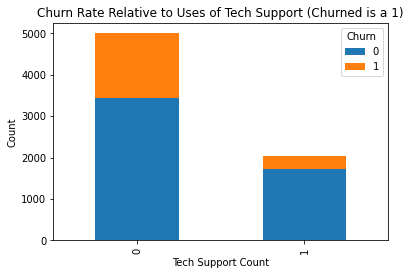

In [171]:

tech_support_churn = pd.crosstab(data['TechSupport'], data['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to Uses of Tech Support (Churned is a 1)')
plt.show()


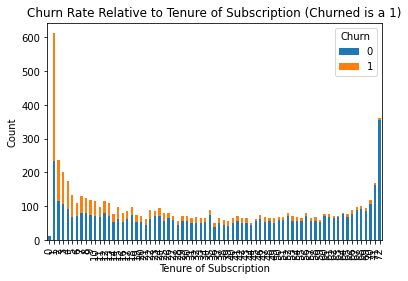

In [172]:

tenure_churn = pd.crosstab(data['tenure'], data['Churn'])
tenure_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate Relative to Tenure of Subscription (Churned is a 1)')
plt.show()


In [173]:
features = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
data[features].describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.494534,0.162147,0.481755,0.298026,32.371149,0.901888,0.421269,1.222206,0.286100,0.344314,0.343320,0.289649,0.383785,0.387761,0.687491,0.591793,1.313503,64.697004
std,0.500006,0.368612,0.499702,0.457424,24.559481,0.297487,0.493798,0.779535,0.451969,0.475178,0.474851,0.453632,0.486341,0.487274,0.832727,0.491537,1.149799,30.171186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000


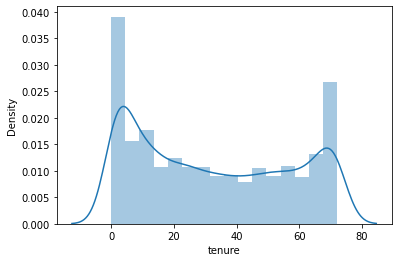

In [174]:

sns.distplot(data['tenure']);


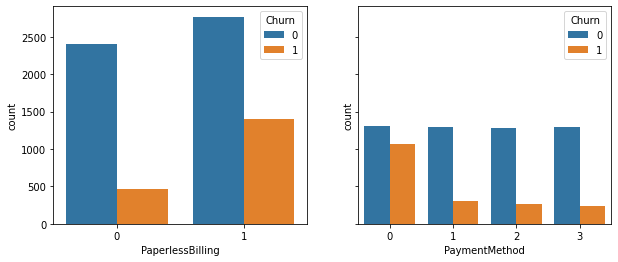

In [175]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='PaperlessBilling', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='PaymentMethod', hue='Churn',
              data=data, ax=axes[1]);

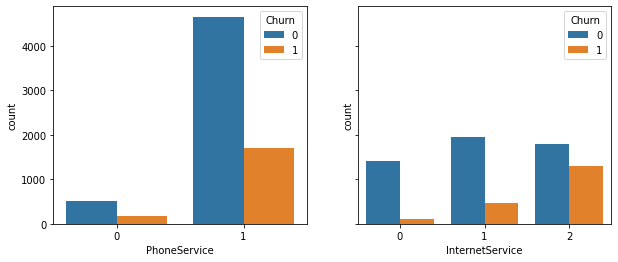

In [176]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='PhoneService', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='InternetService', hue='Churn',
              data=data, ax=axes[1]);

In [154]:
corr_matrix=data.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
InternetService     0.317126
MonthlyCharges      0.194125
PaperlessBilling    0.192315
SeniorCitizen       0.150889
StreamingTV         0.063947
StreamingMovies     0.061561
MultipleLines       0.040801
PhoneService        0.014454
gender              0.009466
DeviceProtection   -0.065467
OnlineBackup       -0.081569
Partner            -0.148924
Dependents         -0.162416
TechSupport        -0.164016
OnlineSecurity     -0.170573
TotalCharges       -0.198324
PaymentMethod      -0.261501
tenure             -0.352229
Contract           -0.395050
Name: Churn, dtype: float64

## 6:  Prepare the Data

 Splitting the data for testing and training.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.30, 
                                                    random_state=101)

In [142]:
train=pd.concat([X_train,y_train],axis=1)

In [177]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg

### Get the accuracy of the model 

In [144]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [178]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [146]:
target = 'Churn'
IDcol = 'customerID'

In [147]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
y_pred=classifier.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score 
score=accuracy_score(y_test,y_pred)

In [150]:
score

0.7893989588263133

In [151]:
import pickle
pickle_out= open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()

##  Model Selection, Predictions, and Metrics




In [180]:
# To return the XGBClassifier object based on the values of the features.

In [179]:
!pip install xgboost
# XGBoost converts weak learners to strong learners through an ensemble method. 

In [51]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [181]:
# These are the initial parameters before tuning.
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [183]:
from xgboost import XGBClassifier
import xgboost as xgb

In [184]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Churn'])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 44, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=44, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [185]:
get_accuracy(first_model,predictors)


Model Report
Accuracy : 0.8022
AUC Score (Train): 0.848516


TotalCharges        267
MonthlyCharges      242
tenure              148
Contract             59
PaymentMethod        56
InternetService      44
PaperlessBilling     36
SeniorCitizen        33
OnlineBackup         29
gender               29
StreamingTV          25
TechSupport          24
MultipleLines        22
OnlineSecurity       21
Dependents           18
StreamingMovies      18
PhoneService         16
DeviceProtection     15
Partner              12
dtype: int64


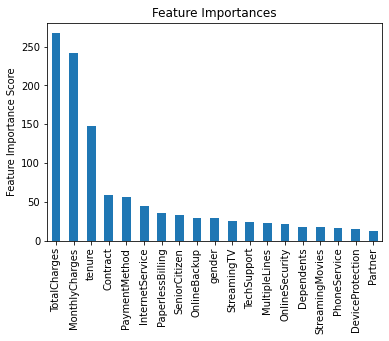

In [186]:
get_feature_importances(first_model)

### Second Prediction: Using intial Parameters and removing features of least importances

In [188]:
dropl=['DeviceProtection','Dependents','Dependents','gender','StreamingMovies','MultipleLines']

In [189]:
dropl_first=dropl+[target,IDcol]

In [190]:
# These are the initial parameters before tuning.
predictors = drop_features(dropl_first)
xgb1 = XgbClass()
second_model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 67, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [191]:
get_accuracy(second_model,predictors)


Model Report
Accuracy : 0.8017
AUC Score (Train): 0.844551


MonthlyCharges      463
TotalCharges        347
tenure              254
PaymentMethod        89
Contract             69
SeniorCitizen        51
InternetService      50
PaperlessBilling     46
OnlineBackup         43
StreamingTV          41
OnlineSecurity       34
PhoneService         31
Partner              30
TechSupport          28
dtype: int64


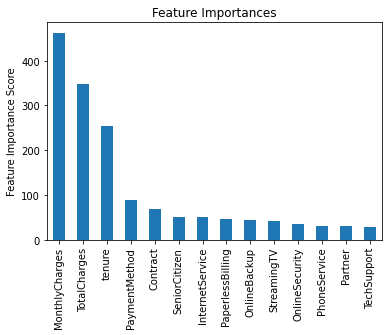

In [192]:
get_feature_importances(second_model)

### Third Prediction: Again removing the features of least importance

In [193]:
dropl1=dropl+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']
dropl_second=dropl_first+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']

In [194]:
predictors=drop_features(dropl_second)

In [195]:
xgb1=XgbClass()
third_model=modelfit(xgb1,train,predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 53, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [196]:
get_accuracy(third_model,predictors)


Model Report
Accuracy : 0.8022
AUC Score (Train): 0.843294


Predict new cases 

In [197]:
predictors = drop_features(dropl_first)
predictors

['SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [198]:
param_test1 = {
 'max_depth':list(range(5,10,1)),
 'min_child_weight':list(range(5,10,1))
}
gsearch1 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test1,
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=3)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   24.5s finished


({'mean_fit_time': array([0.29702349, 0.27998958, 0.27779465, 0.27446313, 0.28224874,
         0.33455191, 0.3277987 , 0.32484393, 0.32606521, 0.32067771,
         0.37507343, 0.37414579, 0.3698699 , 0.36150594, 0.35922346,
         0.41422615, 0.41318212, 0.39708071, 0.39282756, 0.38567867,
         0.44998264, 0.43624229, 0.42889805, 0.42623649, 0.38377352]),
  'mean_score_time': array([0.00679126, 0.00646758, 0.0064115 , 0.00746212, 0.00717711,
         0.00701218, 0.00734801, 0.00756545, 0.00691724, 0.00685802,
         0.0074738 , 0.00835714, 0.00740752, 0.00738969, 0.00764866,
         0.00776563, 0.00816216, 0.00792556, 0.00995469, 0.00922346,
         0.00987468, 0.01037006, 0.00808473, 0.0096899 , 0.00739231]),
  'mean_test_score': array([0.84408592, 0.84420922, 0.84428728, 0.84410971, 0.84527436,
         0.84184832, 0.84134039, 0.84223246, 0.84246774, 0.84340866,
         0.84083737, 0.84206037, 0.84209995, 0.84094776, 0.84246355,
         0.83874115, 0.84080547, 0.84142478,

In [199]:
param_test2 = {
 'max_depth':[6,7,8,9],
 'min_child_weight':[2,3,4,5]
}
gsearch2 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test2,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.33601518, 0.33794203, 0.33533187, 0.33020415, 0.3880558 ,
         0.38264122, 0.37878051, 0.37788882, 0.44270124, 0.43065863,
         0.42118101, 0.41536942, 0.49658246, 0.47312222, 0.46203337,
         0.43990526]),
  'mean_score_time': array([0.0076098 , 0.00755949, 0.00704718, 0.00718184, 0.00984259,
         0.00853715, 0.0085844 , 0.00740962, 0.00799732, 0.00811286,
         0.00780087, 0.0081172 , 0.00831308, 0.00819516, 0.0081573 ,
         0.00762763]),
  'mean_test_score': array([0.83878459, 0.83967543, 0.84111777, 0.84184832, 0.83721526,
         0.83816979, 0.84018822, 0.84083737, 0.83605548, 0.83672975,
         0.83772028, 0.83874115, 0.83609798, 0.8358003 , 0.83696071,
         0.83905939]),
  'param_max_depth': masked_array(data=[6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False, False, False, False, False],
         fi

In [73]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': None, 'n_estimators': 15, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [74]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.7946
AUC Score (Train): 0.838666


In [75]:
# To tune gamma.

In [200]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,min_child_weight=5),
                      param_grid =param_test3,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.3788558 , 0.37581258, 0.37603135, 0.37570195, 0.37738657,
         0.37410603, 0.37965288, 0.37011151]),
  'mean_score_time': array([0.00832458, 0.00864658, 0.00858636, 0.0074471 , 0.00740867,
         0.00743122, 0.00743799, 0.00705123]),
  'mean_test_score': array([0.84083737, 0.83999037, 0.83966686, 0.8412269 , 0.84043215,
         0.84097862, 0.84072463, 0.84117794]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7}],
  'rank_test_score': array([4, 7, 8, 1, 6, 3, 5, 2], dtype=int32),
  'split0_test_score': array([0.85358392, 0.85301706, 0.85503549, 0.85399184, 0.85380642,
         0.85453221, 0.85323691, 0.85424613]),
  'split1_test_score'

In [77]:
xgb1 = XgbClass(max_depth=7,min_child_weight=5,gamma=0)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 5, 'missing': None, 'n_estimators': 21, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [78]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.7993
AUC Score (Train): 0.843434


In [79]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,
                                         min_child_weight=5,gamma=0),
                      param_grid =param_test4,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.32370863, 0.32674174, 0.31974707, 0.31863637, 0.339429  ,
         0.34170585, 0.33712649, 0.33281503, 0.37763109, 0.37648373,
         0.37660608, 0.36638937, 0.39214926, 0.39759984, 0.3912467 ,
         0.3849844 ]),
  'mean_score_time': array([0.00859451, 0.00743241, 0.0075314 , 0.0074666 , 0.00748577,
         0.00766487, 0.00748801, 0.00778809, 0.00745106, 0.00743709,
         0.00761986, 0.0087265 , 0.00857792, 0.00747623, 0.00746074,
         0.00714316]),
  'mean_test_score': array([0.84207253, 0.84248785, 0.84149287, 0.83962723, 0.84173305,
         0.84151831, 0.84067471, 0.83851256, 0.84106167, 0.84091039,
         0.84083737, 0.83837139, 0.8415971 , 0.84167555, 0.84027045,
         0.83983561]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8,
                     0.8, 0.9, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, F

In [80]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4,gamma=0.4,subsample=0.8,colsample_bytree=0.6)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 0.4, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': None, 'n_estimators': 23, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [201]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.7974
AUC Score (Train): 0.839952


In [91]:
ls -l

total 248
drwx------ 5 root root   4096 Jun 10 15:58 drive/
-rw-r--r-- 1 root root 119495 Jun 10 16:28 model_save2
drwxr-xr-x 1 root root   4096 Jun  1 13:40 sample_data/
-rw-r--r-- 1 root root 119435 Jun 10 18:12 xgboost_model.pkl


## 10: Next Steps
* Run some actual data from your company. For case study purposes, let's keep going with dummy data ...
* After some initial analysis, cleaning, and tuning we're consistently getting an accuracy of 80% and AUC ~84%. Feature engineering and tuning did not improve (in some cases made worse, seems to be overfitting).
* This meets our prediction success threshold of 80%.
* Share findings with team. 
* Discuss some possible next steps:
    * Get more data. This is only ~7k records and much different than the stated overall 50%.
    * Get more detailed data on features that are showing to be relatively MORE predictive: 
      * MonthlyCharges
      * Tenure
      * PaymentMethod
      * Plan Types 
      
  * **Get more detailed data on features that are showing to be relatively LESS predictive but our analysis show with more details they could be really useful**
      * Tech support: how many calls to tech support lifetime and in past month since churning, instead of just a contact tech support: Y / N.
  * **Get additional data on features we think may be very predictive but we don't have here yet** 
    * Time to first success point
    * Other data specific to the business
    * Etc.
    
 ## Help Transform Customer Experience
  * Iterate products to transform customer experiences: 
    * Personalized features (i.e if low NPS go to different flow) 
    * Data predictions (i.e. predict churn from TechSupport interaction and alert the customer support team to intervene, and automatically have the technology prompt the user for answering their questions), 
    * Propensity modeling (i.e set scorecards for customer predicted churn based on numerous factors. flag those users when they go 'red" for action with marketing and customer case outreach).
  
  **Activity loop:**
  * Iterate
  * Communicate
  * Put into production
  * Scale
  * Assess
  * Repeat
  
  Questions? 
  Michelle Bonat
  michelle.bonat@gmail.com
  [michellebonat.com](http://michellebonat.com)

## 11: Appendix

## The initial data showed that more tech support interactions reduced customer churn. Here are some ways to put that information into action:
To get customers interacting with tech support instead of cancelling:

1) Include this NPS data in the dataset for analysis, it is from the questionnaire in QuickBooks. 

2) Make sure screens/flow to include links to Support during the Cancel process. 

3) Offer users a way to get help even live chat right there instead of just a cancel option. 

4) There could also be a 'Resolve Your Issue' link right next to the cancel option. 